<a href="https://colab.research.google.com/github/mordor-ai/M2-MIASHS-DIVERS/blob/main/Correction_TP_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://download.wetransfer.com//eu2/5c65c6143251210adf5da45b710d0b8920210103124917/e0ad236d54b2ffb0c92751a9e46f0dcc6b6faff1/out_toto.tar.gz?cf=y&token=eyJhbGciOiJIUzI1NiJ9.eyJleHAiOjE2MDk4NjE0MTMsInVuaXF1ZSI6IjVjNjVjNjE0MzI1MTIxMGFkZjVkYTQ1YjcxMGQwYjg5MjAyMTAxMDMxMjQ5MTciLCJmaWxlbmFtZSI6Im91dF90b3RvLnRhci5neiIsIndheWJpbGxfdXJsIjoiaHR0cDovL3Byb2R1Y3Rpb24uYmFja2VuZC5zZXJ2aWNlLmV1LXdlc3QtMS53dDo5MjkyL3dheWJpbGwvdjEvc2Fya2FyL2E1NjFlOWIyZmQ2OGUxYzgyZTYyYjMxMThmZTdmMzU0OTA2NjVkZjZkZmU5ZDI5ZjFiZTdmNmU1NTM0ZWFmNzRjZWQ3NjM5ZTMwYzQ5NWVkNDdiODE3IiwiZmluZ2VycHJpbnQiOiJlMGFkMjM2ZDU0YjJmZmIwYzkyNzUxYTllNDZmMGRjYzZiNmZhZmYxIiwiY2FsbGJhY2siOiJ7XCJmb3JtZGF0YVwiOntcImFjdGlvblwiOlwiaHR0cDovL3Byb2R1Y3Rpb24uZnJvbnRlbmQuc2VydmljZS5ldS13ZXN0LTEud3Q6MzAwMC93ZWJob29rcy9iYWNrZW5kXCJ9LFwiZm9ybVwiOntcInRyYW5zZmVyX2lkXCI6XCI1YzY1YzYxNDMyNTEyMTBhZGY1ZGE0NWI3MTBkMGI4OTIwMjEwMTAzMTI0OTE3XCIsXCJkb3dubG9hZF9pZFwiOjExMTUzMDIwMzE5fX0ifQ.qwH2E_1vM_LzYtLT7jRLP1G1smCMmCfg1Hq8RZZNCQE" -O toto.tar.gz 



Cannot open cookies file ‘/tmp/cookies.txt’: No such file or directory
--2021-01-05 15:43:31--  https://download.wetransfer.com//eu2/5c65c6143251210adf5da45b710d0b8920210103124917/e0ad236d54b2ffb0c92751a9e46f0dcc6b6faff1/out_toto.tar.gz?cf=y&token=eyJhbGciOiJIUzI1NiJ9.eyJleHAiOjE2MDk4NjE0MTMsInVuaXF1ZSI6IjVjNjVjNjE0MzI1MTIxMGFkZjVkYTQ1YjcxMGQwYjg5MjAyMTAxMDMxMjQ5MTciLCJmaWxlbmFtZSI6Im91dF90b3RvLnRhci5neiIsIndheWJpbGxfdXJsIjoiaHR0cDovL3Byb2R1Y3Rpb24uYmFja2VuZC5zZXJ2aWNlLmV1LXdlc3QtMS53dDo5MjkyL3dheWJpbGwvdjEvc2Fya2FyL2E1NjFlOWIyZmQ2OGUxYzgyZTYyYjMxMThmZTdmMzU0OTA2NjVkZjZkZmU5ZDI5ZjFiZTdmNmU1NTM0ZWFmNzRjZWQ3NjM5ZTMwYzQ5NWVkNDdiODE3IiwiZmluZ2VycHJpbnQiOiJlMGFkMjM2ZDU0YjJmZmIwYzkyNzUxYTllNDZmMGRjYzZiNmZhZmYxIiwiY2FsbGJhY2siOiJ7XCJmb3JtZGF0YVwiOntcImFjdGlvblwiOlwiaHR0cDovL3Byb2R1Y3Rpb24uZnJvbnRlbmQuc2VydmljZS5ldS13ZXN0LTEud3Q6MzAwMC93ZWJob29rcy9iYWNrZW5kXCJ9LFwiZm9ybVwiOntcInRyYW5zZmVyX2lkXCI6XCI1YzY1YzYxNDMyNTEyMTBhZGY1ZGE0NWI3MTBkMGI4OTIwMjEwMTAzMTI0OTE3XCIsXCJkb3dubG9hZF9pZFwiOjExMTUzMDI

In [ ]:
!ls -ahl
!tar xvzf  toto.tar.gz

In [ ]:
import numpy as np
import tensorflow as tf
import xml.etree.ElementTree as ET
import glob
from IPython.display import Image, display
import matplotlib
import matplotlib.pyplot as plt
import random

from tensorflow.keras.applications.resnet import preprocess_input
import tensorflow.keras as keras
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Add,Concatenate, MaxPooling2D,Activation, Input, Lambda, Conv2D, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras  import backend as K
from scipy import misc
import imageio
from skimage.transform import resize
from PIL import Image





import os

In [ ]:
sizes = [512-2*32, 512-32, 512, 512+32]
labels=[" ", "visage", "mask", "poor"]

max_grid = max(sizes)//32


NCROSS=10
CROSS=0
batch_size=4
anchors = [ 116,90, 156,198, 373,326, #RESOLUTION 8
            30,61, 62, 45, 59,119, #RESOLUTION 16
            10,13, 16,30, 33,23]#RESOLUTION 32

max_box_per_image=100

In [ ]:
class MyBox:
    def __init__(self, xmin, ymin, xmax, ymax):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
     
    def best_anchors(self, anchors):
        shifted_box = self.shift()
        max_anchor = None
        max_index = -1
        max_iou = -1
        for i, anchor in enumerate(anchors):
            iou    = self.bbox_iou(anchor)
            if max_iou < iou:
                max_anchor = anchor
                max_index  = i
                max_iou    = iou   
        return max_anchor, max_index
        
    def getCenterX(self):
      return 0.5*(self.xmin+self.xmax)
    def getCenterY(self):
        return 0.5*(self.ymin+self.ymax)
    def getCenterW(self):
        return (self.xmax - self.xmin)
    def getCenterH(self):
        return (self.ymax - self.ymin)  
    def shift(self):
        return MyBox(0,0,self.getCenterW(), self.getCenterH())
    def area(self):
        return self.getCenterW() * self.getCenterH()

    def overlap(self, box):
        mini_x = max(self.xmin, box.xmin)
        maxi_x = min(self.xmax, box.xmax)
        intersect_x = max(maxi_x - mini_x, 0)
        
        mini_y = max(self.ymin, box.ymin)
        maxi_y = min(self.ymax, box.ymax)
        intersect_y = max(maxi_y - mini_y, 0) 
        return intersect_x*intersect_y

    def bbox_iou(self, box):
        intersect = self.overlap(box)
        union     = self.area() + box.area() - intersect 
        return intersect / (union + 0.00000000001)


In [ ]:
class Objet:
    def __init__(self, xml_part):
        self.name = str(xml_part.find('name').text) #mask_weared_incorrect without_mask with_mask

        self.xmin = int(xml_part.find('bndbox').find('xmin').text)
        self.xmax = int(xml_part.find('bndbox').find('xmax').text)
        self.ymin = int(xml_part.find('bndbox').find('ymin').text)
        self.ymax = int(xml_part.find('bndbox').find('ymax').text)

    def __str__(self):
        return self.name+" "+str(self.xmin)+" "+str(self.xmax)+" "+str(self.ymin)+" "+str(self.ymax)+" "+str(self.label)


premiers =  [ 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31,37, 41, 43, 47, 53, 59, 61, 67, 71, 73,79, 83, 89, 97, 101, 103, 107, 109, 113, 127,131, 137, 139, 149, 151, 157, 163, 167, 173, 179,181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283,293, 307, 311, 313, 317, 331, 337, 347, 349, 353,359, 367, 373, 379, 383, 389, 397, 401, 409, 419,421, 431, 433, 439, 443, 449, 457, 461, 463, 467,479, 487, 491, 499, 503, 509, 521, 523, 541, 547,557, 563, 569, 571, 577, 587, 593, 599, 601, 607,613, 617, 619, 631, 641, 643, 647, 653, 659, 661,673, 677, 683, 691, 701, 709, 719, 727, 733, 739,743, 751, 757, 761, 769, 773, 787, 797, 809, 811,821, 823, 827, 829, 839, 853, 857, 859, 863, 877,881, 883, 887, 907, 911, 919, 929, 937, 941, 947,953, 967, 971, 977, 983, 997 ]
class ReadXML:
    def __init__(self, ch):
        tree = ET.parse(ch)
        self.root = tree.getroot()
        self.filename=  self.root.find('filename').text
        if "annotations" in ch:
            self.image  = imageio.imread('toto_base/images/'+self.filename)[:,:,:3]/255.0
        elif "medical-masks-dataset" in ch:
            self.image  = imageio.imread('toto_base/medical-masks-dataset/images/'+self.filename)[:,:,:3]/255.0

        ratio = -1
        if self.image.shape[0]>1024:
            ratio = self.image.shape[0]/1024
        if self.image.shape[1]>1024:
            tmp_ratio = self.image.shape[1]/1024
            if tmp_ratio>ratio:
                ratio = tmp_ratio
        if ratio>0:
             self.image = resize( self.image      , 
                                 ( int(self.image.shape[0]//ratio), int(self.image.shape[1]//ratio)), order=3)
    
    
        dif_axis0=dif_axis1=0
        if (self.image.shape[0]//32 != self.image.shape[0]/32):
            dif_axis0 = (self.image.shape[0]//32+1)*32 - self.image.shape[0]
        if (self.image.shape[1]//32 != self.image.shape[1]/32):
            dif_axis1= (self.image.shape[1]//32+1)*32 - self.image.shape[1]

        self.image = np.pad(self.image, ((0, dif_axis0), (0,dif_axis1), (0,0)), 'constant',  constant_values=(0))
        
        
        
        self.image_zone = np.zeros((self.image.shape[0], self.image.shape[1]), dtype=np.int32)
        self.image_zone[:,:]=1
        self.links={}
        self.valide=True
        
        self.nbMask=self.nbMal=self.nbNone=0
        if (len(self.root.findall('object'))==0):
            print ("prob grave!")
        
        
        #if (len(self.root.findall('object'))>max_box_per_image):
        #    self.valide=False

        self.objs=[]
        for i, ob in enumerate(self.root.findall('object')):
            tmp = Objet(ob)
            
            
            
            '''
            self.image_zone[int(tmp.ymin*ratioY):int(tmp.ymax*ratioY),
                                int(tmp.xmin*ratioX):int(tmp.xmax*ratioX)]*=premiers[i]
            '''
            if ratio>0:
                self.image_zone[int(tmp.ymin//ratio):int(tmp.ymax//ratio),
                                int(tmp.xmin//ratio):int(tmp.xmax//ratio)]*=premiers[i]
            else:
                self.image_zone[tmp.ymin:tmp.ymax,tmp.xmin:tmp.xmax]*=premiers[i]
                

            if tmp.ymin>tmp.ymax or tmp.xmin>tmp.xmax:
                self.valide=False
            
            
            if "annotations" in ch:
                if tmp.name=="with_mask":            
                    self.links[premiers[i]]=2
                    self.nbMask+=1
                elif tmp.name=="mask_weared_incorrect":
                    self.nbMal+=1
                    self.links[premiers[i]]=3
                elif tmp.name=="without_mask":
                    self.links[premiers[i]]=1
                    self.nbNone+=1
                else:
                    print("BUG")

            else:
                if tmp.name=="mask":            
                    self.links[premiers[i]]=2
                    self.nbMask+=1
                elif tmp.name=="poor":
                    self.links[premiers[i]]=3
                    self.nbMal+=1
                elif tmp.name=="none":
                    self.links[premiers[i]]=1
                    self.nbNone+=1
                else:
                    print("BUG")


def crop_resize(img, imglabel, size_square):
    maxi_size = max(img.shape[0], img.shape[1])
    ratio = float(maxi_size)/size_square
    img = resize(img, 
                ( int(min(size_square, img.shape[0]/ratio)), 
                  int(min(size_square, img.shape[1]/ratio))),
                 order=random.choice([0,0,1,1,1]))


    imglabel =tf.image.resize(
                np.expand_dims(imglabel, axis=-1),
        [int(min(size_square, imglabel.shape[0]/ratio)),int(min(size_square, imglabel.shape[1]/ratio))],
        method='nearest').numpy()[:, :, 0]

    dif_axis0=dif_axis1=0
    if (img.shape[0] <size_square):
        dif_axis0 = size_square- img.shape[0] 
    if (img.shape[1] < size_square):
        dif_axis1= size_square- img.shape[1] 

    img      = np.pad(img, ((0, dif_axis0), (0,dif_axis1), (0,0)), 'constant',  constant_values=(0))
    imglabel = np.pad(imglabel, ((0, dif_axis0), (0,dif_axis1)), 'constant',  constant_values=(1))

    return img, imglabel


In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_link, batch_size=32,  shuffle=True):
        self.downsample = 32
        self.batch_size = batch_size
        self.data    = {}
        self.anchors = [MyBox(0, 0, anchors[2*i], anchors[2*i+1]) for i in range(len(anchors)//2)]
        for nid, id in enumerate(data_link):
                if nid%200==0:
                    print( nid )         
                    xml = ReadXML(id)
                if xml.valide:
                    self.data[id] = xml
                              
        self.indices = list(self.data.keys())
        self.shuffle = shuffle
        self.on_epoch_end()


    def __len__(self):
        return len(self.indices) // self.batch_size

    def __getitem__(self, index):
        index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
        keys = [self.indices[k] for k in index]
        return self.__get_data(keys)

    def on_epoch_end(self):
        self.index = np.arange(len(self.indices))
        if self.shuffle == True:
            np.random.shuffle(self.index)

            
    def __get_data(self, keys):
        size = random.choice(sizes)
        net_h, net_w = size, size
        base_grid_h, base_grid_w = net_h//self.downsample, net_w//self.downsample
        x_batch = np.zeros((self.batch_size, net_h, net_w, 3)) 
        t_batch = np.zeros((self.batch_size,1,1,1,max_box_per_image, 4))
        yolo_1 = np.zeros((self.batch_size, 1*base_grid_h,  1*base_grid_w,3,4+1+len(labels)))
        yolo_2 = np.zeros((self.batch_size, 2*base_grid_h,  2*base_grid_w,3,4+1+len(labels)))
        yolo_3 = np.zeros((self.batch_size, 4*base_grid_h,  4*base_grid_w,3,4+1+len(labels)))
        yolos = [yolo_3, yolo_2, yolo_1]

        for id_batch, id_ in enumerate(keys):
            xml = self.data[id_]
            true_box_index=0
            
            
            if random.random()<0.3: 
                mini = int(min(xml.image.shape[0], xml.image.shape[1]) * (0.5+random.random()/2.0))
                px = random.randint(0,xml.image.shape[1] - mini - 1 )
                py = random.randint(0,xml.image.shape[0] - mini - 1 )
                
                tmp_img, tmp_label = xml.image[py:py+mini, px:px+mini, :], xml.image_zone[py:py+mini, px:px+mini]
                tmp_img, tmp_label = crop_resize(tmp_img, tmp_label, size)
            else:
                tmp_img, tmp_label = crop_resize(xml.image, xml.image_zone, size)
            x_batch[id_batch] = tmp_img
          
            for j, premier in enumerate(list(xml.links.keys())):
                x = tmp_label%premier==0
                
                if(np.sum(x)>=15):
                    x = np.where(x)

                    box = MyBox(    np.min(x[1]), 
                                    np.min(x[0]),
                                    np.max(x[1]),                                     
                                    np.max(x[0])) 
                    
                    if box.getCenterW()>10 and box.getCenterH()>10:
                        max_anchor, max_index = box.best_anchors(self.anchors)
                        iyolo = max_index // 3
                        yolo = yolos[iyolo]
                        center_x = box.getCenterX()
                        center_x = center_x/net_w * yolo.shape[2] 
                        center_y = box.getCenterY()
                        center_y = center_y/net_h * yolo.shape[1]

                        w = np.log((box.getCenterW()+0.00000001 ) / float(max_anchor.xmax))
                        h = np.log((box.getCenterH()+0.00000001 ) / float(max_anchor.ymax))

                        label_indx = xml.links[premier]

                        grid_x = min( int(np.floor(center_x)) , yolo.shape[2]-1)
                        grid_y = min( int(np.floor(center_y)) , yolo.shape[1]-1)

                        yolo[id_batch, grid_y, grid_x, max_index%3, 0:4] =  [center_x, center_y, w, h]
                        yolo[id_batch, grid_y, grid_x, max_index%3, 4  ] =    1.
                        yolo[id_batch, grid_y, grid_x, max_index%3, 5+label_indx] = 1


                        t_batch[id_batch, 0, 0, 0, true_box_index] = [center_x, center_y, box.getCenterW(),box.getCenterH()]
                        true_box_index += 1

                        if true_box_index>max_box_per_image:
                            print ("BUG ? max_box_per_image")
                            toto_bug()

        tmp_keras = np.zeros((self.batch_size, 1))
        x_batch = preprocess_input(x_batch*255)
        return [x_batch, t_batch, yolo_1, yolo_2, yolo_3], [tmp_keras, tmp_keras, tmp_keras] 
         




In [ ]:
all_xml = glob.glob('toto_base/medical-masks-dataset/labels/*.xml')+glob.glob("toto_base/annotations/*.xml")
all_xml = all_xml[:1000]


print (len(all_xml))


random.seed(42)
random.shuffle(all_xml)

sp = np.array_split(all_xml, NCROSS)
test_xml_imggb  = sp[CROSS]
train_xml_imggb = np.concatenate([x for i,x in enumerate(sp) if i!=CROSS], axis=0) 
train_xml_imggb = train_xml_imggb
test_xml_imggb  = test_xml_imggb

print ("TAILLE TEST ",len(test_xml_imggb) )
print ("TAILLE TRAIN ",len(train_xml_imggb) )
train = DataGenerator(data_link=train_xml_imggb, batch_size=batch_size,  shuffle=True)
val   = DataGenerator(data_link=test_xml_imggb, batch_size=batch_size,  shuffle=True)


 

1000
TAILLE TEST  100
TAILLE TRAIN  900
0
200
400
600
800
0


In [ ]:
for b in train:
  x, y = b
  #plt.imshow(x[0][0])
  #break

KeyboardInterrupt: ignored

In [ ]:

def to_float(x):
    return tf.cast(x, tf.float32)

class YoloLayer(tf.keras.layers.Layer):#YoloLayer {1,2,3}
    def __init__(self, anchors, max_grid, batch_size):
        self.anchors        = tf.constant(anchors, dtype='float', shape=[1,1,1,3,2])

        max_grid_h, max_grid_w = max_grid
        cell_x = to_float( tf.reshape(tf.tile(tf.range(max_grid_w), [max_grid_h]),
                                      (1, max_grid_h, max_grid_w, 1, 1)) 
                          )
        cell_y = tf.transpose(cell_x, (0,2,1,3,4))
        self.cell_grid = tf.tile(tf.concat([cell_x,cell_y],-1), [batch_size, 1, 1, 3, 1])

        print (" YoloLayer",      self.cell_grid.shape)
        print (" self.cell_x",  cell_x.shape)
        print (" self.cell_y",  cell_y.shape)
        print ("max_grid_h, max_grid_w ", max_grid_h, max_grid_w )

        
        super(YoloLayer, self).__init__()

    def build(self, input_shape):
        super(YoloLayer, self).build(input_shape)  



    """
    def overlap(self, box):
        mini_x = max(self.xmin, box.xmin)
        maxi_x = min(self.xmax, box.xmax)
        intersect_x = max(maxi_x - mini_x, 0)
        
        mini_y = max(self.ymin, box.ymin)
        maxi_y = min(self.ymax, box.ymax)
        intersect_y = max(maxi_y - mini_y, 0) 
        return intersect_x*intersect_y

    def bbox_iou(self, box):
        intersect = self.overlap(box)
        union     = self.area() + box.area() - intersect 
        return intersect / (union + 0.00000000001) <- ancre reduction
    """

    #B x GH x GW x 3 x 1 x 2
    #B x GH x GW x 3 x 1 x 2
    #B x 1 x 1 x 1 x OBJ x 2
    #B x 1 x 1 x 1 x OBJ x 2
    def iou(self, pred_xy, pred_wh, true_xy, true_wh):
        pred_mins  = pred_xy - pred_wh/2
        pred_maxes = pred_xy + pred_wh/2
        #pred_mins (ou pred_maxes) : B x GH x GW x Na x 2 {x,y}

        true_mins  = true_xy - true_wh/2
        true_maxes = true_xy + true_wh/2

        intersect_mins  = tf.maximum(pred_mins, true_mins)
        intersect_maxes = tf.minimum(pred_maxes, true_maxes)

        intersect_wh = tf.maximum(intersect_maxes - intersect_mins, 0.0) #tf.nn.relu
        #intersect_wh : B x GH x GW x Na x 2 {x,y}
        intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]

        pred_areas = pred_wh[..., 0] * pred_wh[..., 1]
        true_areas = true_wh[..., 0] * true_wh[..., 1]
        # true_boxes : B x 1 x 1 x 1 x Nobj x 2

        iou_scores = tf.truediv( intersect_areas, pred_areas+true_areas-intersect_areas)
        #iou_scores : B x GH x GW  x 3 x OBJ x 1 
        best_ious = tf.reduce_max(iou_scores, axis=4 )
        #best_ious : B x GH x GW  x 3  x 1 
        return best_ious


    def call(self, x):
        input_image,     yolo_pred,    y_true,        true_boxes = x 
        #x         ,     yolo_pred (B x GH x GW x (Na+1+4+Nl)),    true_yolo_{1,2,3},    true_boxes
        # yolo_pred (B x GH x GW x (Na+1+4+Nl))
        # true_boxes : B x 1 x 1 x 1 x Nobj x 4
        # true_yolo_ B x GH x GW x Na x (5+Nl)
        #                            0 : x
        #                            1 : y
        #                            2 : w 
        #                            3 : h
        grid_h = tf.shape(y_true)[1]
        grid_w = tf.shape(y_true)[2]
        grid_factor = tf.reshape(tf.cast([grid_w, grid_h], tf.float32), [1,1,1,1,2])

        net_h = tf.shape(input_image)[1]
        net_w = tf.shape(input_image)[2]
        net_factor = tf.reshape(tf.cast([net_w, net_h], tf.float32), [1,1,1,1,2])

        yolo_pred = tf.reshape(yolo_pred,
                            tf.concat([tf.shape(yolo_pred)[:3], tf.constant([3, -1])], axis=0))
        #yolo_pred = tf.reshape(yolo_pred,[-1, grid_h, grid_w, 3, len(labels) + 1 +4  ], axis=0))

        conserver_uniquement_les_objets = tf.expand_dims( y_true[...,4], axis=4)
        prediction_uniquement_les_objets = tf.expand_dims( 
            tf.sigmoid( yolo_pred[...,4] ) , axis=4) #math.


        pred_box_xy =self.cell_grid[:, :grid_h, :grid_w,:,:] + tf.sigmoid( yolo_pred[...,0:2]) # Unité grille (float)
        pred_box_wh = yolo_pred[...,2:4] #Unité logit (B x GH x GW x 3 x 2)
        pred_box_class = yolo_pred[...,5:] #score (pas des proba)

        #pred_box_xy / grid_factor : normalise de Unité grille -> Unité entre 0..1
        #tf.expand_dims(..) rajoute une dimension à la 4ème position
        #pred_box_xy : B x GH x GW x 3 x 2
        #grid_factor : 1 x 1  x 1  x 1 x 2
        #pred_xy     : B x GH x GW x 3 x 1 x 2
        pred_xy = tf.expand_dims(pred_box_xy / grid_factor, 4)                      #<<<-------
        pred_wh = tf.expand_dims(tf.exp(pred_box_wh) * self.anchors / net_factor, 4)#<<<-------
        #pred_wh     : B x GH x GW x 3 x 1 x 2 (0..1)


        true_box_xy    = y_true[..., 0:2] 
        true_box_wh    = y_true[..., 2:4] #log grille => voir générateur 
        true_box_class = tf.argmax(y_true[..., 5:], -1)   

        true_xy = true_boxes[..., 0:2] / grid_factor  #<<<-------
        true_wh = true_boxes[..., 2:4] / net_factor   #<<<-------
        #true_wh : ? 

        best_ious = self.iou(pred_xy, pred_wh, true_xy, true_wh)
        conf_delta = prediction_uniquement_les_objets * tf.expand_dims(to_float(best_ious < 0.5), 4)
        #exemples négatifs 
        
        #LOSS
        _scale = tf.exp(true_box_wh) * self.anchors / net_factor
        _scale = tf.expand_dims(2 - _scale[..., 0]*_scale[..., 1], axis=4)

        xy_delta = conserver_uniquement_les_objets * (pred_box_xy-true_box_xy) * _scale
        wh_delta = conserver_uniquement_les_objets * (pred_box_wh-true_box_wh) * _scale

        conf_delta  = conserver_uniquement_les_objets  *   \
                    (prediction_uniquement_les_objets-conserver_uniquement_les_objets) * 5  \
                    + (1-conserver_uniquement_les_objets) * conf_delta
                      #{1 : rien , 0:obj}

        class_delta = conserver_uniquement_les_objets * \
              tf.expand_dims(  tf.nn.sparse_softmax_cross_entropy_with_logits(labels=true_box_class,logits=pred_box_class ),
                             axis=4)
              

        #xy_delta : B x GH x GW x 3 x 2
        xy_delta = tf.reduce_sum(tf.square(xy_delta), axis=[1,2,3,4])
        wh_delta = tf.reduce_sum(tf.square(wh_delta), axis=[1,2,3,4])
        class_delta = tf.reduce_sum(class_delta, axis=[1,2,3,4])
        conf_delta = tf.reduce_sum(tf.square(conf_delta), axis=[1,2,3,4])

        return conf_delta+class_delta+wh_delta+xy_delta
  
    def compute_output_shape(self, input_shape):
        return [(None, 1)]


def convolution(in_, name, filter, kernel=3,strides=1, activation=True ):
  x = Conv2D(filter, kernel,strides=strides, name='conv_'+name, padding='SAME', use_bias=False)(in_)#use_bias=False
  x = BatchNormalization(epsilon=0.001, name='bn_'+name)(x)
  if activation:
      x = LeakyReLU(alpha=0.1, name='conv_activation_'+name)(x)
  return x


def create_model(nb_class, anchors, max_box_per_image, max_grid, batch_size):
    input_image = Input(shape=(None, None, 3))
    true_boxes = Input(shape=(1, 1, 1,  max_box_per_image, 4))
    true_yolo_1 = Input(shape=(None, None,  3, 4+1+nb_class))
    true_yolo_2 = Input(shape=(None, None,  3, 4+1+nb_class))
    true_yolo_3 = Input(shape=(None, None,  3, 4+1+nb_class))


    res = tf.keras.applications.ResNet101(
        include_top=False, 
        weights="imagenet",
        input_tensor=input_image,
        input_shape=(None, None, 3)
    )

    l32 = res.get_layer("conv5_block3_out").output
    l16 = res.get_layer("conv4_block23_out").output
    l8 = res.get_layer("conv3_block4_out").output

    x = convolution(in_=l32, name="A_c0", filter=1024 )
    yolo_pred_1 = convolution(in_=x, name="A_c1", filter=3*(4+1+len(labels)), activation=False )
    loss_yolo_1 = YoloLayer(anchors[12:], max_grid=[max_grid, max_grid], batch_size=batch_size)  ([input_image,yolo_pred_1,true_yolo_1, true_boxes])

    x = convolution(in_=l32, name="B_c0", filter=256 )
    x = UpSampling2D(2)(x)
    x = Concatenate()([x, l16])

    x = convolution(in_=x, name="B_c1", filter=256 )
    x = convolution(in_=x, name="B_c2", filter=256 )
    x = convolution(in_=x, name="B_c3", filter=256 )
    yolo_pred_2 = convolution(in_=x, name="B_c4", filter=3*(4+1+len(labels)), activation=False)
    loss_yolo_2 = YoloLayer(anchors[6:12], max_grid=[max_grid*2, max_grid*2], batch_size=batch_size)  ([input_image,yolo_pred_2,true_yolo_2, true_boxes])

    x = convolution(in_=x, name="C_c0", filter=128 )
    x = UpSampling2D(2)(x)
    x = Concatenate()([x, l8])
    x = convolution(in_=x, name="C_c1", filter=128 )
    x = convolution(in_=x, name="C_c2", filter=128 )
    x = convolution(in_=x, name="C_c3", filter=128 )
    x = convolution(in_=x, name="C_c4", filter=128 )
    yolo_pred_3 = convolution(in_=x, name="C_c5", filter=3*(4+1+len(labels)), activation=False )
    loss_yolo_3 = YoloLayer(anchors[:6], max_grid=[max_grid*4, max_grid*4], batch_size=batch_size)  ([input_image,yolo_pred_3,true_yolo_3, true_boxes])

    train_model = Model([input_image,true_boxes, true_yolo_1,true_yolo_2,true_yolo_3], [loss_yolo_1,loss_yolo_2,loss_yolo_3])
    infer_model = Model(input_image, [yolo_pred_1,yolo_pred_2,yolo_pred_3])
    return  train_model, infer_model



def loss_f(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(y_pred))

In [ ]:
train_model, infer_model = create_model(nb_class=len(labels),
             anchors=anchors,
             max_box_per_image=max_box_per_image, 
             max_grid=max_grid,
             batch_size=batch_size)




 YoloLayer (4, 17, 17, 3, 2)
 self.cell_x (1, 17, 17, 1, 1)
 self.cell_y (1, 17, 17, 1, 1)
max_grid_h, max_grid_w  17 17
 YoloLayer (4, 34, 34, 3, 2)
 self.cell_x (1, 34, 34, 1, 1)
 self.cell_y (1, 34, 34, 1, 1)
max_grid_h, max_grid_w  34 34
 YoloLayer (4, 68, 68, 3, 2)
 self.cell_x (1, 68, 68, 1, 1)
 self.cell_y (1, 68, 68, 1, 1)
max_grid_h, max_grid_w  68 68


In [ ]:
tf.keras.utils.plot_model(
    train_model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=96
)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.798805 to fit



In [ ]:
opti = tf.keras.optimizers.Adam(lr=0.001, clipnorm=0.001)
train_model.compile(loss=loss_f, optimizer=opti)

In [ ]:
EPOCH=20
tf.config.run_functions_eagerly(True)
train_model.fit(train, epochs=EPOCH, verbose=1, validation_data=val, max_queue_size=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/20
225/225 [==============================] - 204s 902ms/step - loss: 177.9715 - yolo_layer_13_loss: 25.2766 - yolo_layer_14_loss: 50.8468 - yolo_layer_15_loss: 101.8480 - val_loss: 1167.5378 - val_yolo_layer_13_loss: 30.4058 - val_yolo_layer_14_loss: 82.6684 - val_yolo_layer_15_loss: 1054.4636
Epoch 2/20
225/225 [==============================] - 203s 899ms/step - loss: 154.0038 - yolo_layer_13_loss: 22.3018 - yolo_layer_14_loss: 44.5789 - yolo_layer_15_loss: 87.1231 - val_loss: 1639.1509 - val_yolo_layer_13_loss: 23.4595 - val_yolo_layer_14_loss: 84.5671 - val_yolo_layer_15_loss: 1531.1240
Epoch 3/20
225/225 [==============================] - 199s 884ms/step - loss: 131.0910 - yolo_layer_13_loss: 19.1912 - yolo_layer_14_loss: 38.3172 - yolo_layer_15_loss: 73.5827 - val_loss: 129.5437 - val_yolo_layer_13_loss: 17.4287 - val_yolo_layer_14_loss: 44.3604 - val_yolo_layer_15_loss: 67.7546
Epoch 4/20
225/225 [==============================] - 198s 880ms/step - loss: 113.0910 - yolo

In [ ]:
import cv2
import matplotlib.patches as patches


class BoundBox(MyBox):
    def __init__(self, xmin, ymin, xmax, ymax, c = None, classes = None):
        self.c       = c
        self.classes = classes
        self.proba_max = np.max(self.classes)
        self.label = -1
        self.score = -1
        super(BoundBox, self).__init__(xmin, ymin, xmax, ymax)
        
    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
        return self.score      


def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5

    boxes = []

    netout[..., :2]  = tf.nn.sigmoid(netout[..., :2]).numpy()  #XY
    netout[..., 4]   = tf.nn.sigmoid(netout[..., 4]).numpy()   #Confidence
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * tf.nn.softmax(netout[..., 5:]).numpy() #Proba
    netout[..., 5:] *= netout[..., 5:] > obj_thresh #Proba supérieur à seuil
    
    for i in range(grid_h*grid_w):
        row = i // grid_w
        col = i % grid_w
        
        for b in range(nb_box):
            # 4th element is objectness score
            objectness = netout[row, col, b, 4]
            
            if(objectness <= obj_thresh): 
                continue
            
            # first 4 elements are x, y, w, and h
            x, y, w, h = netout[row,col,b,:4]

            x = (col + x) / grid_w # center position, unit: 0..1
            y = (row + y) / grid_h # center position, unit: 0..1
            w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: 0..1
            h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: 0..1  
            
            # last elements are class probabilities
            classes = netout[row,col,b,5:]
            
            box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)

            boxes.append(box)

    return boxes


                    
                         
                    
def get_yolo_boxes(model, batch_input, net_h, net_w, anchors, obj_thresh):
    image_h, image_w    = batch_input.shape[1], batch_input.shape[2]
    nb_images           = batch_input.shape[0]
    batch_output        = model.predict_on_batch(batch_input)
    batch_boxes         = [None]*nb_images

    
    for i in range(nb_images):
        yolos = [batch_output[0][i], batch_output[1][i], batch_output[2][i]]
        #         r32                 r16                 r8
        boxes = []
        for j in range(len(yolos)):
            yolo_anchors = anchors[(2-j)*6:(3-j)*6] 
            boxes += decode_netout(yolos[j], yolo_anchors, obj_thresh, net_h, net_w)

        for j in range(len(boxes)):
            boxes[j].xmin = int(boxes[j].xmin  * image_w)
            boxes[j].xmax = int(boxes[j].xmax  * image_w)
            boxes[j].ymin = int(boxes[j].ymin  * image_h)
            boxes[j].ymax = int(boxes[j].ymax  * image_h)

        valide = np.ones((len(boxes)), dtype=bool)
        for j in range(len(boxes)-1):  
            if valide[j]: 
                k =j+1
                flag=True
                while k<len(boxes) and flag: 
                    if valide[k]: 
                        if boxes[j].bbox_iou(boxes[k])>0.35: #Très très strict 
                            if (boxes[j].proba_max > boxes[k].proba_max):
                                valide[k]=False
                            else:
                                valide[j]=False
                                flag=False
                    k+=1
                    
        boxes_tmp = []
        for j in range(len(boxes)):
            if valide[j]:
                boxes_tmp.append(boxes[j])
                
        batch_boxes[i] = boxes_tmp

    return batch_boxes 


def draw_boxes(image, boxes, labels, obj_thresh):
    fig,ax = plt.subplots(1, dpi=120 )
    plt.imshow(image[0])
    for box in boxes:
        label_str = ''
        label = -1
        
        for i in range(len(labels)):
            if box.classes[i] > obj_thresh:
                if label_str != '': label_str += ', '
                label_str += (labels[i] + ' ' + str(round(box.get_score()*100, 2)) + '%')
                label = i
        
        color = ['m','r', 'b', 'g'][label]
        
        if label >= 0:
            text_size = cv2.getTextSize(label_str, cv2.FONT_HERSHEY_SIMPLEX, 1.1e-3 * image.shape[0], 5)
            width, height = text_size[0][0], text_size[0][1]


            rect = patches.Rectangle((int(box.xmin),int(box.ymin)),
                                     int(box.xmax-box.xmin),int(box.ymax-box.ymin),
                                     linewidth=2,edgecolor=color,facecolor='none')
            ax.add_patch(rect)
            plt.text(int(box.xmin),int(box.ymin),str(label_str), color=color)

    plt.show()
    return image   
    

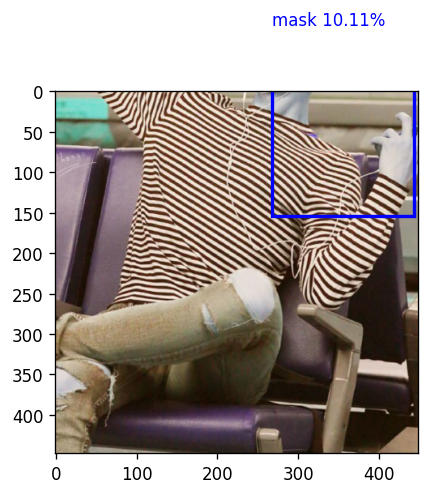

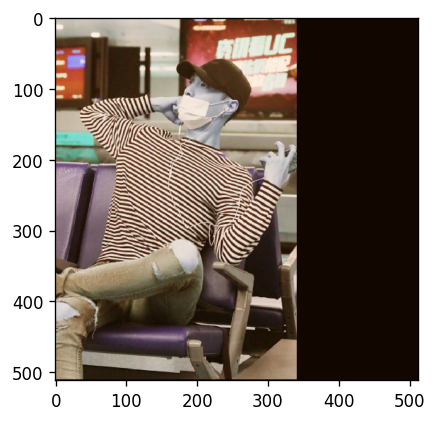

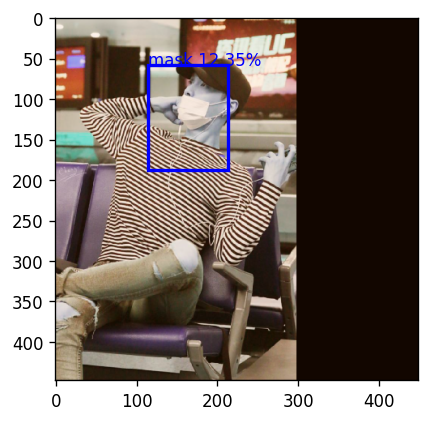

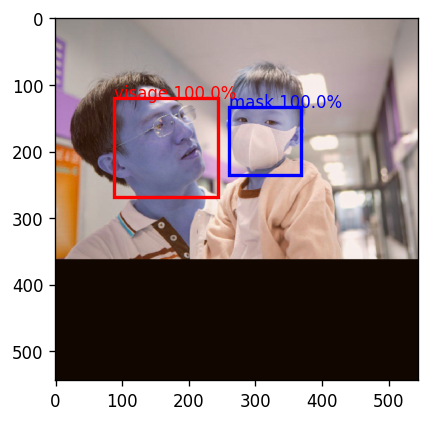

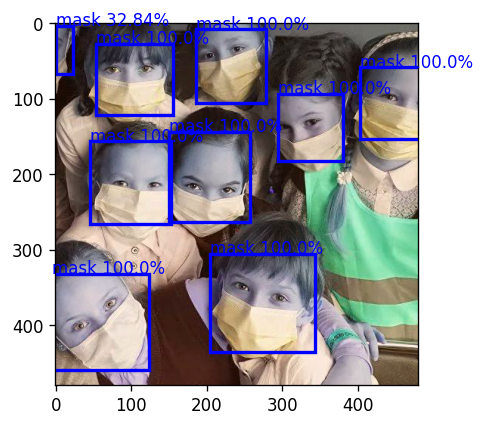

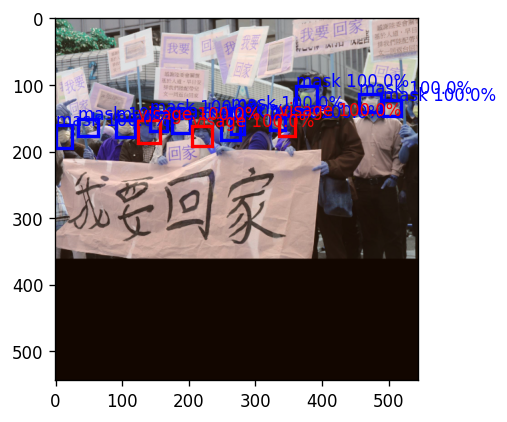

In [ ]:
obj_thresh = 0.1

for i in range(3):
    
    obj = val.__getitem__(i)
    img = obj[0][0][:1]
    net_h, net_w = img.shape[1], img.shape[2]

    boxes = get_yolo_boxes(infer_model, img, net_h, net_w, anchors, obj_thresh)
    img = (img-np.min(img))/(np.max(img)-np.min(img))
    draw_boxes(img, boxes[0], labels, obj_thresh=obj_thresh)


